<a href="https://colab.research.google.com/github/CoderZIE/ApproximateMultiplier/blob/main/Activations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")


import torch
import torch.nn
import torchvision.models as models
import torch.quantization
from scipy.stats import gaussian_kde



In [ ]:
#importing the CIFAR10 Dataset
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


32/32 [==============================] - 0s 3ms/step


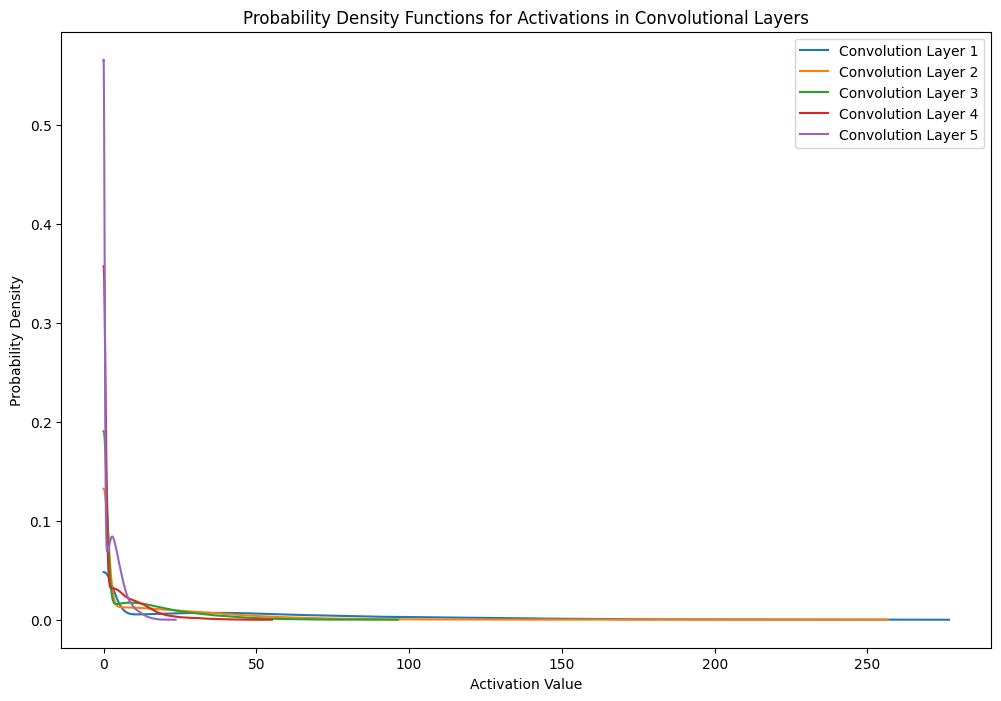

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from scipy.stats import gaussian_kde

# Create a simplified version of your AlexNet model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,3), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(10,activation='softmax'))

# Create a model that outputs the activations of the convolutional layers
conv_layers = [Model(inputs=AlexNet.inputs, outputs=layer.output) for layer in AlexNet.layers if isinstance(layer, Conv2D)]

# Assuming you have an input image named 'input_image' with shape (32, 32, 3)
input_images = x_train[:1000]  # Replace this with your actual input data

# Plot PDFs for activations from each convolutional layer
plt.figure(figsize=(12, 8))
for i, conv_layer in enumerate(conv_layers):
    # Get the activations of the current convolutional layer
    conv_activations = conv_layer.predict(input_images).flatten()

    # Calculate the probability density function using a kernel density estimate (KDE)
    kde = gaussian_kde(conv_activations)
    x = np.linspace(min(conv_activations), max(conv_activations), 1000)
    y = kde(x)

    # Plot the PDF
    plt.plot(x, y, label=f'Convolution Layer {i+1}')

# Set plot title and labels
plt.title('Probability Density Functions for Activations in Convolutional Layers')
plt.xlabel('Activation Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


32/32 [==============================] - 0s 5ms/step


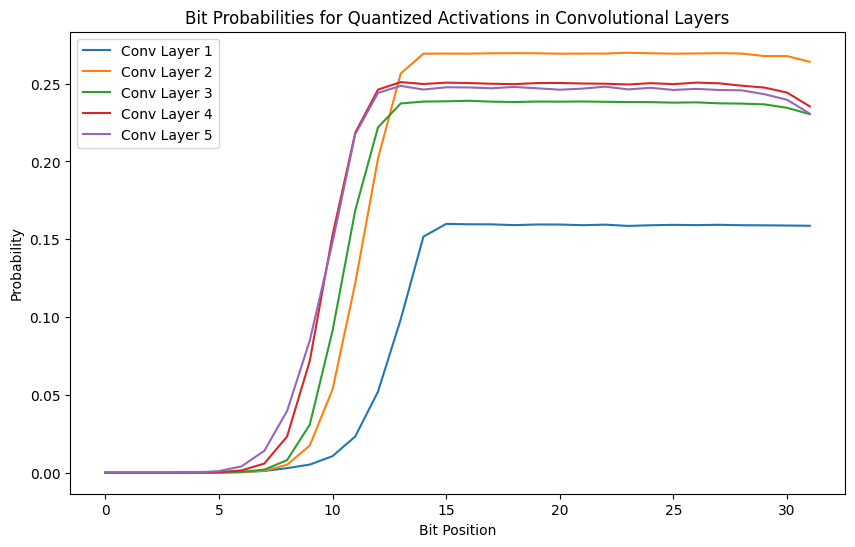

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from scipy.stats import gaussian_kde

# Create a simplified version of your AlexNet model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(4, 4), input_shape=(32, 32, 3), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
AlexNet.add(Conv2D(60, (5, 5), padding='same', activation='relu'))
AlexNet.add(Conv2D(60, (3, 3), padding='same', activation='relu'))
AlexNet.add(Conv2D(30, (3, 3), padding='same', activation='relu'))
AlexNet.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Create a model that outputs the activations of the convolutional layers
conv_layers = [Model(inputs=AlexNet.inputs, outputs=layer.output) for layer in AlexNet.layers if isinstance(layer, Conv2D)]

# Assuming you have an input image named 'input_image' with shape (32, 32, 3)
input_images = x_train[:1000]  # Replace this with your actual input data

# Initialize an array to store bit probabilities for each layer
bit_probabilities_layers = []

# Loop through each convolutional layer
for i, conv_layer in enumerate(conv_layers):
    # Get activations and quantize to 32 bits
    activations = conv_layer.predict(input_images).flatten()
    quantized_activations = np.round(activations * 2**31).astype(int)

    # Calculate bit probabilities
    bit_positions = np.arange(32)
    bit_probabilities = [np.sum((quantized_activations & (1 << j)) != 0) / len(quantized_activations) for j in bit_positions]

    # Store bit probabilities for the current layer
    bit_probabilities_layers.append(bit_probabilities)

# Plot the bit probabilities for all layers in a single line plot
plt.figure(figsize=(10, 6))
for i, bit_probabilities in enumerate(bit_probabilities_layers):
    plt.plot(bit_positions, bit_probabilities, label=f'Conv Layer {i+1}')

plt.title('Bit Probabilities for Quantized Activations in Convolutional Layers')
plt.xlabel('Bit Position')
plt.ylabel('Probability')
plt.legend()
plt.show()
